## 什么是决策树

1. 非参数学习方法
2. 可以解决分类问题
3. 天然可以解决多分类问题
4. 也可以解决回归问题
5. 非常好的可解释性

![](http://p9tybni1b.bkt.clouddn.com/%E4%BB%80%E4%B9%88%E6%98%AF%E5%86%B3%E7%AD%96%E6%A0%91.png)

### 复杂度

预测：O(logm)<br>
训练: O(n\*m\*logm)<br>
剪枝：降低复杂度，解决过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def plot_decision_boundary(model,axis):
    """决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
#         np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100).reshape(-1,1))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

## 熵计算和基尼系数的异同

1. 熵计算比基尼系数稍慢
2. scikit-learn中默认为基尼系数
3. 大多数情况二者没有特别的优劣

## 信息熵（随机变量不确定度的度量）

1. 熵越大，数据的不确定性越高
2. 熵越小，数据的分类越确定

![](http://p9tybni1b.bkt.clouddn.com/%E4%BF%A1%E6%81%AF%E7%86%B5.png)

In [3]:
def entropy(p):
    """二分类交叉熵"""
    return -p*np.log(p) - (1-p)*np.log(1-p)

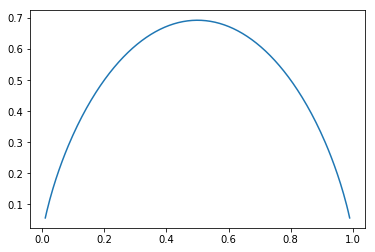

In [4]:
x = np.linspace(0.01,0.99,200)
plt.plot(x,entropy(x))
plt.show()

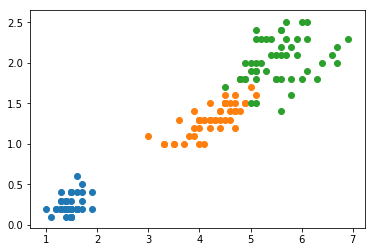

In [5]:
iris = datasets.load_iris()
x = iris.data[:,2:]
y = iris.target

plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dc.fit(x,y)
dc.score(x,y)

0.96

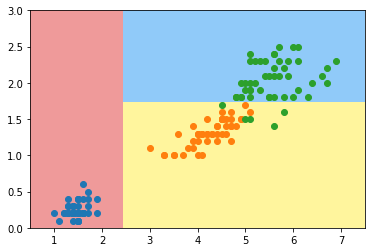

In [7]:
plot_decision_boundary(dc,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

## 基尼系数

![](http://p9tybni1b.bkt.clouddn.com/%E5%9F%BA%E5%B0%BC%E7%B3%BB%E6%95%B0.png)

In [6]:
def G(p):
    return 2*p-2*p**2

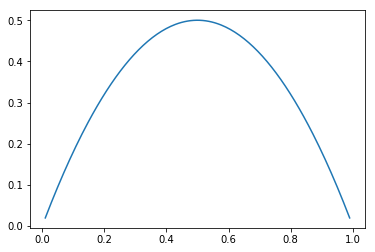

In [7]:
x = np.linspace(0.01,0.99,200)
plt.plot(x,G(x))
plt.show()

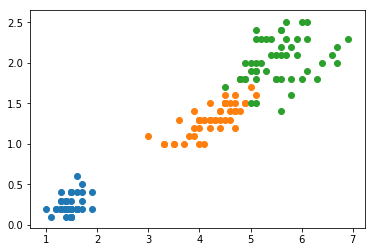

In [8]:
iris = datasets.load_iris()
x = iris.data[:,2:]
y = iris.target

plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=2,criterion="gini")
dc.fit(x,y)
dc.score(x,y)

0.96

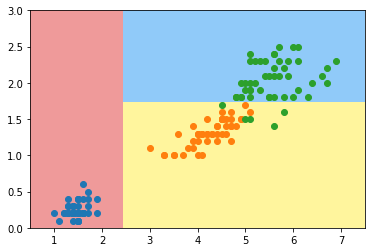

In [10]:
plot_decision_boundary(dc,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

## 模拟使用信息熵划分

In [20]:
from collections import Counter


def split(X,Y,dim,value):
    indexA = X[:,dim]<=value
    indexB = X[:,dim]>value
    return X[indexA],X[indexB],Y[indexA],Y[indexB]


def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num/len(y)
        res += -p*np.log(p)
    return res


def try_split(X,Y):
    best_entropy = float("inf")
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d]+X[sorted_index[i],d])/2
                x_l,x_r,y_l,y_r = split(X,Y,d,v)
                e = entropy(y_l)+entropy(y_r)
                if e<best_entropy:
                    best_entropy,best_d,best_v = e,d,v
    return best_entropy,best_d,best_v


if __name__ == "__main__":
    best_entropy,best_d,best_v = try_split(x,y)
    print("best_entropy=",best_entropy)
    print("best_d=",best_d)
    print("best_v=",best_v)
    
    x1_l,x1_r,y1_l,y1_r = split(x,y,best_d,best_v)
    print(entropy(y1_l))
    print(entropy(y1_r))
    
    best_entropy2,best_d2,best_v2 = try_split(x1_r,y1_r)
    print("best_entropy=",best_entropy2)
    print("best_d=",best_d2)
    print("best_v=",best_v2)
    
    x2_l,x2_r,y2_l,y2_r = split(x1_r,y1_r,best_d2,best_v2)
    print(entropy(y2_l))
    print(entropy(y2_r))

best_entropy= 0.6931471805599453
best_d= 0
best_v= 2.45
0.0
0.6931471805599453
best_entropy= 0.4132278899361904
best_d= 1
best_v= 1.75
0.30849545083110386
0.10473243910508653


## 模拟使用基尼系数划分

In [21]:
from collections import Counter


def split(X,Y,dim,value):
    indexA = X[:,dim]<=value
    indexB = X[:,dim]>value
    return X[indexA],X[indexB],Y[indexA],Y[indexB]


def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num/len(y)
        res -= p**2
    return res


def try_split(X,Y):
    best_g = 1e9
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d]+X[sorted_index[i],d])/2
                x_l,x_r,y_l,y_r = split(X,Y,d,v)
                g = gini(y_l)+gini(y_r)
                if g<best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v


if __name__ == "__main__":
    best_g,best_d,best_v = try_split(x,y)
    print("best_g=",best_g)
    print("best_d=",best_d)
    print("best_v=",best_v)
    
    x1_l,x1_r,y1_l,y1_r = split(x,y,best_d,best_v)
    print(gini(y1_l))
    print(gini(y1_r))
    
    best_g2,best_d2,best_v2 = try_split(x1_r,y1_r)
    print("best_g2=",best_g2)
    print("best_d2=",best_d2)
    print("best_v2=",best_v2)
    
    x2_l,x2_r,y2_l,y2_r = split(x1_r,y1_r,best_d2,best_v2)
    print(gini(y2_l))
    print(gini(y2_r))

best_g= 0.5
best_d= 0
best_v= 2.45
0.0
0.5
best_g2= 0.2105714900645938
best_d2= 1
best_v2= 1.75
0.1680384087791495
0.04253308128544431


## 超参数调优

![](http://p9tybni1b.bkt.clouddn.com/%E5%86%B3%E7%AD%96%E6%A0%91%E8%B6%85%E5%8F%82%E6%95%B0.png)

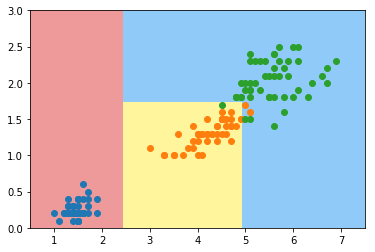

In [29]:
iris = datasets.load_iris()
x = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=3,criterion="gini")
dc.fit(x,y)
dc.score(x,y)

plot_decision_boundary(dc,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

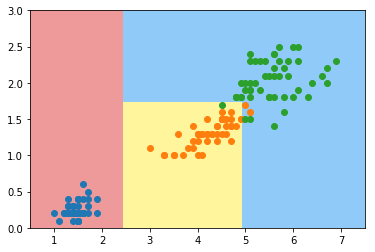

In [46]:
dc = DecisionTreeClassifier(min_samples_leaf=5,criterion="gini")
dc.fit(x,y)
dc.score(x,y)

plot_decision_boundary(dc,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

## 决策树解决回归问题

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
x = boston.data
y = boston.target
trainX,testX,trainY,testY = train_test_split(x,y)

In [78]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf=3)
dt_reg.fit(trainX,trainY)
print("train:",dt_reg.score(trainX, trainY))
print("test:",dt_reg.score(testX,testY))

train: 0.8340090210169837
test: 0.7389146453386009


In [79]:
def MyDecisionTreeRegressor(trainX,trainY,testX,testY,deep=3,min_samples_leaf=3):
    dt_reg = DecisionTreeRegressor(max_depth=deep,min_samples_leaf=min_samples_leaf)
    dt_reg.fit(trainX,trainY)
    return dt_reg.score(trainX,trainY),dt_reg.score(testX,testY)

In [143]:
# 网格搜索
best_score = np.zeros((10,20))

for i in range(1,10):
    for j in range(1,20):
        train,test = MyDecisionTreeRegressor(trainX,trainY,testX,testY,deep=i,min_samples_leaf=j)
        
        best_score[i,j] = test
            
print(np.max(best_score))
row,column = np.where(best_score==np.max(best_score))
print("row:",row[0])
print("column:",column[0])

0.7707301283273235
row: 4
column: 3


## 决策树的局限性

1. 决策边界横平竖直
2. 对于个别样本点非常敏感

![](http://p9tybni1b.bkt.clouddn.com/%E5%86%B3%E7%AD%96%E6%A0%91%E7%9A%84%E5%B1%80%E9%99%90%E6%80%A7.png)

### 实际

![](http://p9tybni1b.bkt.clouddn.com/%E5%86%B3%E7%AD%96%E6%A0%91%E5%B1%80%E9%99%90%E6%80%A72.png)